<a href="https://colab.research.google.com/github/Myashka/IVICT.HACK-team-HI/blob/data/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir data

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving tweet_emotions.csv.zip to tweet_emotions.csv.zip


{'tweet_emotions.csv.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xb6}8R?\xc3\xa8\xd4\xff\xff\xff\xff\xff\xff\xff\xff\x12\x00\x14\x00tweet_emotions.csv\x01\x00\x10\x00\x92\x7f9\x00\x00\x00\x00\x00\xa0\xef\x18\x00\x00\x00\x00\x00\xbc\xbdis\x1b\xc9\x92-\xf8}\xcc\xe6?\x04y\x9f\xb5\xaa\xca \x14\xf6\xa5\xae\xb5\t\xdc$\xb1\x8a\x14\xd5"Uz\xd5mm\xea\x002\x00\xa4\x98\x0b:\x17\x82\xa9\x0f\xf3\xdb\xc7\x8f{l\xac[\xf7\xd9\xcc\x98\xbda\xdf\x96J 232\x16\xf7\xe3\xee\xc7\xdd\x9b\xa31\xcd\xd74\xe9\xd5\xa6h\xd2\x9c\xfe\xe8m\xca\xa2\xa1\xbf\xff\xcf\xffc\xb8\x9c\xce\x96\xb3\xf9x2\xec\x99\xfc\xd0t\xbdU\x93n\xb7\xba\xe8\xb2\xd6\xa8T=\x16\xe5Q\xd1\xdfG]\xab,\xad\xe9\x9a\xb4PM\xa9\xd6:Q{\xbdN\x1bet\x95\xa5\xa6R\xbaH\xe8{u\xa3\xab\xc6$j[\x19\xfdH_\xd5\x8d\xda\xa7\xb5:\xd0\xa7\xea_\xff\xc3?n6\x9b\xf5j\x9d\x14\xa6\xae{7\xba\xa3/\x16jM\x97\x1d\xd3f\xaf\xb4\xda\x1b\x9d\xe8\xcd\xde(\xd5\xee\xf6\xf4\xd3\xef\xf7\x8f:m\xe8ke\xa1\xba\xb2\xad\xd4Fg\x19}\x1an\xb8\x0c7|\xdb\x16\xa6\xd2\x99\xda\x98\xca\xe4e\xd1\xd1\xf7vYY\xe6\x1

In [ ]:
!unzip -d data tweet_emotions.csv.zip

Archive:  tweet_emotions.csv.zip
  inflating: data/tweet_emotions.csv  


In [ ]:
!rm tweet_emotions.csv.zip

In [ ]:
!kaggle datasets download -d ishantjuyal/emotions-in-text

  0% 0.00/781k [00:00<?, ?B/s]
100% 781k/781k [00:00<00:00, 113MB/s]


In [ ]:
!mkdir third_dataset

In [ ]:
!mv third_dataset data

In [ ]:
!unzip -d data/third_dataset emotions-in-text.zip

Archive:  emotions-in-text.zip
  inflating: data/third_dataset/Emotion_final.csv  


In [ ]:
!rm emotion-dataset.zip

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df1 = pd.read_csv("data/tweet_emotions.csv")
print('Emotions list from df1:\n' + ', '.join(df1.sentiment.unique()))


Emotions list from df1:
empty, sadness, enthusiasm, neutral, worry, surprise, love, fun, hate, happiness, boredom, relief, anger


tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...

In [ ]:
titles_df2 = ['test.csv', 'training.csv', 'validation.csv']
list_datasets = [pd.read_csv('data/second_dataset/' + i) for i in titles_df2]
df2 = pd.concat(list_datasets)
df2

text  label
0     im feeling rather rotten so im not very ambiti...      0
1             im updating my blog because i feel shitty      0
2     i never make her separate from me because i do...      0
3     i left with my bouquet of red and yellow tulip...      1
4       i was feeling a little vain when i did this one      0
...                                                 ...    ...
1995  im having ssa examination tomorrow in the morn...      0
1996  i constantly worry about their fight against n...      1
1997  i feel its important to share this info for th...      1
1998  i truly feel that if you are passionate enough...      1
1999  i feel like i just wanna buy any cute make up ...      1

[20000 rows x 2 columns]

In [ ]:
for i in range(len(df2['text'])):
  if df2.iloc[i, 1] == 0:
    df2.iloc[i, 1] = 'sadness'
  elif df2.iloc[i, 1] == 1:
    df2.iloc[i, 1] = 'joy'
  elif df2.iloc[i, 1] == 2:
    df2.iloc[i, 1] = 'love'
  elif df2.iloc[i, 1] == 3:
    df2.iloc[i, 1] = 'anger'
  elif df2.iloc[i, 1] == 4:
    df2.iloc[i, 1] = 'worry'
  elif df2.iloc[i, 1] == 5:
    df2.iloc[i, 1] = 'surprise'

In [ ]:
# df1 = df1.drop(['tweet_id'], axis=1)
df1 = df1.rename(columns={'sentiment':'label', 'content':'text'})
df1 = df1.reindex(columns=['text', 'label'])


text       label
0      @tiffanylue i know  i was listenin to bad habi...       empty
1      Layin n bed with a headache  ughhhh...waitin o...     sadness
2                    Funeral ceremony...gloomy friday...     sadness
3                   wants to hang out with friends SOON!  enthusiasm
4      @dannycastillo We want to trade with someone w...     neutral
...                                                  ...         ...
39995                                   @JohnLloydTaylor     neutral
39996                     Happy Mothers Day  All my love        love
39997  Happy Mother's Day to all the mommies out ther...        love
39998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   happiness
39999  @mopedronin bullet train from tokyo    the gf ...        love

[40000 rows x 2 columns]

In [ ]:
df3 = pd.read_csv('data/third_dataset/emotions.csv')
print('Emotions list from df1:\n' + ', '.join(df3.Emotion.unique()))

Emotions list from df1:
sadness, anger, love, surprise, fear, happy


In [ ]:
df3.loc[df3['Emotion'] == 'happy', 'Emotion'] = 'happiness'
df3.loc[df3['Emotion'] == 'fear', 'Emotion'] = 'worry'

In [ ]:
df3 = df3.rename(columns={'Text':'text', 'Emotion':'label'})
df3

text    label
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
21454               Melissa stared at her friend in dism    worry
21455  Successive state elections have seen the gover...    worry
21456               Vincent was irritated but not dismay    worry
21457  Kendall-Hume turned back to face the dismayed ...    worry
21458                    I am dismayed , but not surpris    worry

[21459 rows x 2 columns]

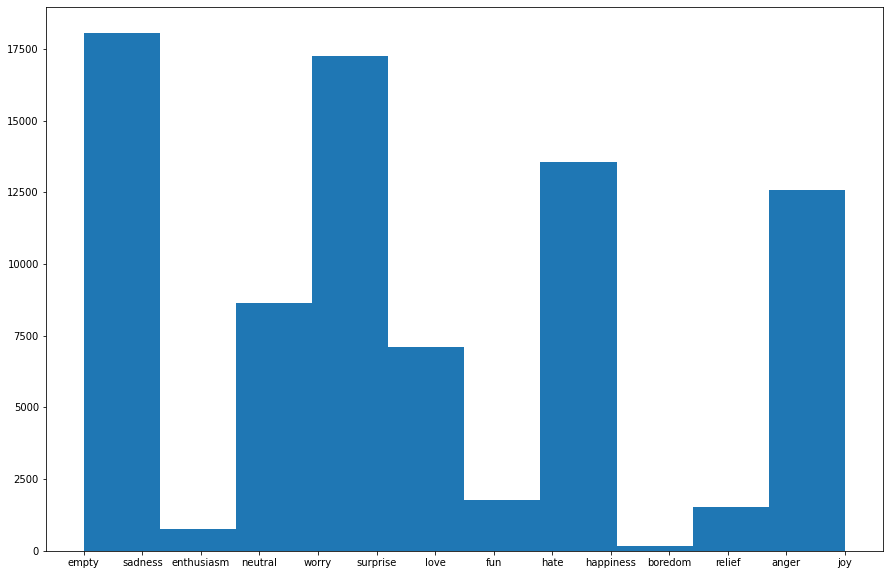

In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)
plt.figure(figsize=(15,10))
plt.hist(df.label)
df.to_csv('dataset.csv')

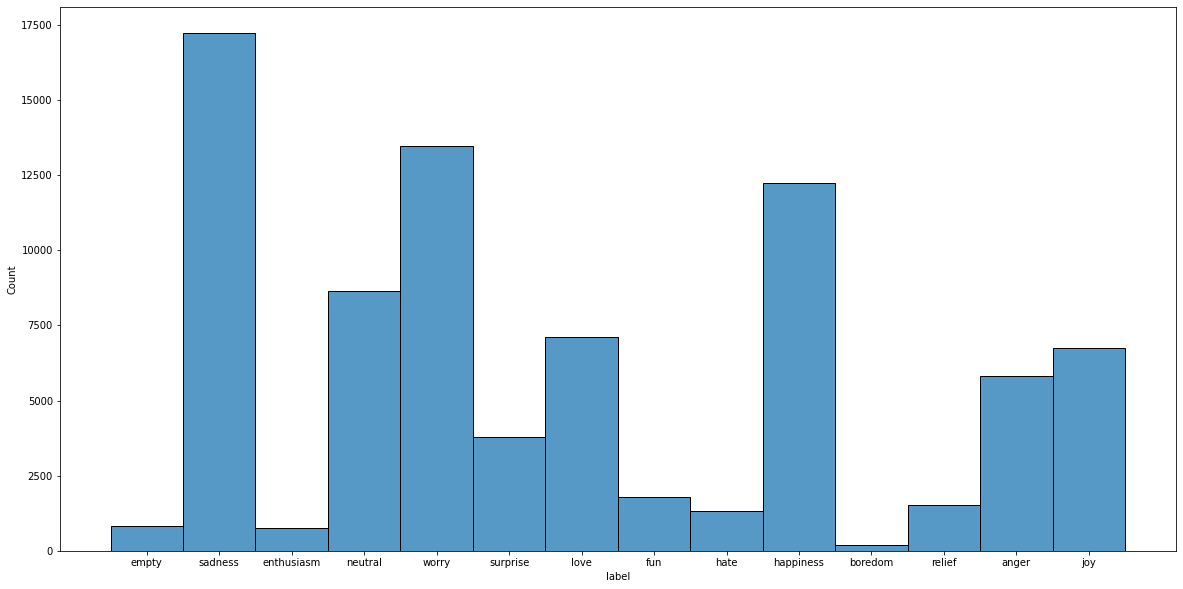

In [ ]:
from numpy.core.function_base import linspace
df = pd.read_csv('dataset.csv')
unique = df.label.unique()
plt.figure(figsize=(20, 10))
bins = [i for i in range(0, 14, 1)]
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]

# plt.xticks(xticks, unique)
# plt.hist(df.label, bins=len(unique), rwidth=0.7)
sb.histplot(df, x='label')